# Parte 3: Comparación de características entre grupos

## Comparar las características del punto anterior entre los grupos apoyándose en gráficos de estadística descriptiva. ¿Qué características logra mejor discriminación entre grupos?

### Comparación del grupo con la DFT (Transformada Discreta de Fourier)

In [19]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dinam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dinam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway  # ANOVA
from scipy.stats import kruskal  # Prueba no paramétrica opcional
from scipy.stats import ttest_ind

In [22]:
# Cargamos los archivos
df_dct = pd.read_excel('./Data/DatosConDCT.xlsx')
df_mfcc = pd.read_excel('./Data/DatosConMfcc1.xlsx')
df_dft = pd.read_excel('./Data/DatosConDFT.xlsx')

df_dft.head()
df_dct.head()
df_mfcc.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,...,mfcc_mean_c12,mfcc_std_c12,mfcc_skew_c12,mfcc_kurt_c12,mfcc_mean_c13,mfcc_std_c13,mfcc_skew_c13,mfcc_kurt_c13,mfcc_energy,mfcc_entropy
0,MUSE_20180712_160452_75000,AFIB,LVH,74,MALE,49,57,92,488,440,...,0.317677,0.304934,-0.363554,0.821946,0.294474,0.274394,-0.401230,0.906553,8742.477472,-29976.562729
1,MUSE_20180118_131905_87000,AFIB,TWC,72,MALE,151,170,84,298,472,...,0.499813,0.475654,0.687231,-0.200141,0.051948,0.300193,0.601651,0.163642,11401.140754,-43937.755827
2,MUSE_20180114_071444_05000,AFIB,TWC,74,MALE,107,108,82,342,456,...,0.313188,0.193084,-0.164045,-0.363562,0.342498,0.142946,-0.295996,-0.181467,11189.783740,-41579.363721
3,MUSE_20180114_132956_24000,AFIB,LVHV TWC,68,MALE,95,87,84,334,419,...,0.349389,0.182630,-0.129309,0.039392,0.305497,0.166178,-1.570059,8.331633,11041.465633,-41342.370863
4,MUSE_20180118_124852_18000,AFIB,STTU,78,MALE,97,153,104,344,436,...,0.221754,0.349224,-0.102692,-0.814647,0.199383,0.316384,-0.242604,-0.308250,12733.285470,-51120.982936


# Características relevantes para comparar (DFT):

- **Freciencia Pico**: Es la frecuencia en Hz donde se encuentra el pico máximo en el espectro, puede ser util porque puede reflejar el ritmo cardíaco dominante o patrones repetitivos anormales en el rítmo cardiaco.

- **Energia Total:** Es la suma de las magnitudes al cuadrado, mide cuanta energía total de la señal en el dominio de la frecuencia. Puede ser util ya que cambios en esta energía pueden indicar alteraciones en la conducción eléctrica del corazón, como las presentes en diversas arritmias.


C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\3986724952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dft, x='Rhythm', y='frecuencia_pico', palette='Pastel1')
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\3986724952.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dft, x='Rhythm', y='energia_total', palette='Pastel2')


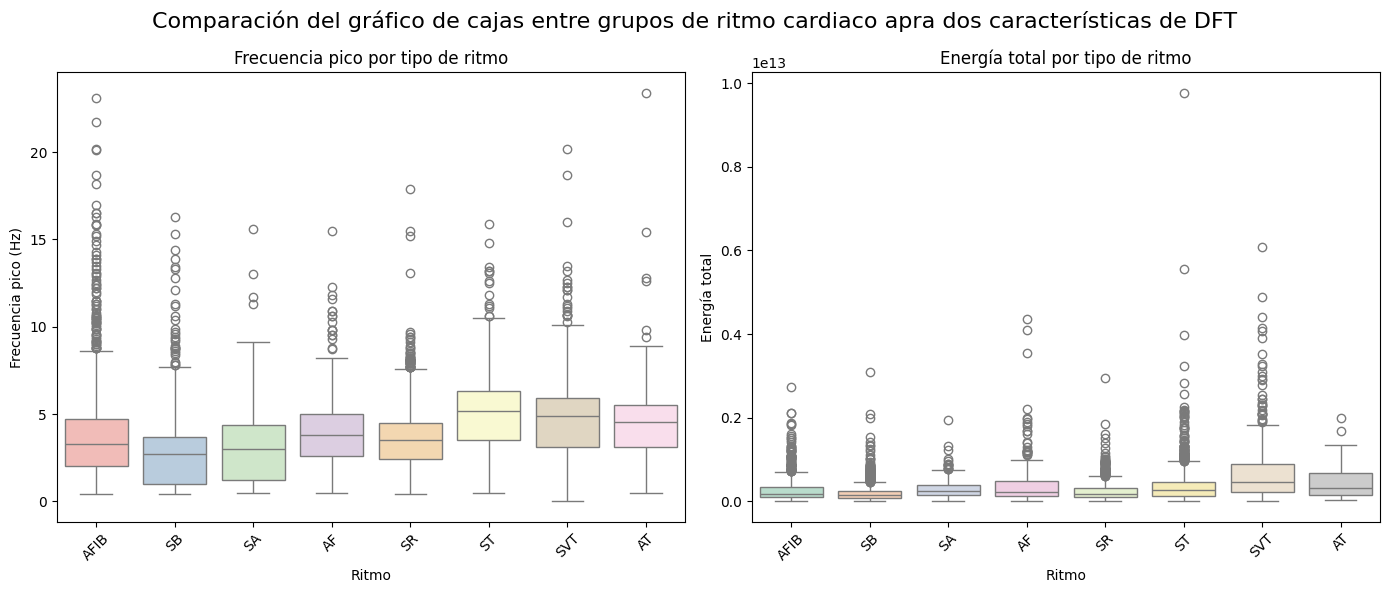

In [23]:
# Gráficos para todos los ritmos disponibles, no solo AFIB y SR
plt.figure(figsize=(14, 6))

# Boxplot de frecuencia pico
plt.subplot(1, 2, 1)
sns.boxplot(data=df_dft, x='Rhythm', y='frecuencia_pico', palette='Pastel1')
plt.title('Frecuencia pico por tipo de ritmo')
plt.ylabel('Frecuencia pico (Hz)')
plt.xlabel('Ritmo')
plt.xticks(rotation=45)

# Boxplot de energía total
plt.subplot(1, 2, 2)
sns.boxplot(data=df_dft, x='Rhythm', y='energia_total', palette='Pastel2')
plt.title('Energía total por tipo de ritmo')
plt.ylabel('Energía total')
plt.xlabel('Ritmo')
plt.xticks(rotation=45)

plt.suptitle("Comparación del gráfico de cajas entre grupos de ritmo cardiaco apra dos características de DFT", fontsize=16)
plt.tight_layout()
plt.show()


En la primera gráfica se observa cómo varía la frecuencia dominante de la señal ECG entre diferentes tipos de ritmos cardíacos. En el caso del ritmo sinusal (SR), que representa un funcionamiento cardíaco normal, la frecuencia pico suele estar más concentrada en un rango específico, reflejando la regularidad del ritmo eléctrico del corazón. Sin embargo, también se observa cierta dispersión en este grupo, lo cual es completamente esperable debido a diferencias fisiológicas entre pacientes, como la edad, el nivel de actividad o incluso variaciones leves en el ritmo sinusal. Por el contrario, en pacientes con fibrilación auricular (AFIB), esta frecuencia pico es mucho más variable, y en muchos casos se ubica en valores más altos. Esto se debe a que la actividad eléctrica en AFIB es muy variable, lo cual genera un espectro más disperso y con picos en diferentes rangos.

En la segunda gráfica se observa la energía total del espectro de la señal ECG. En los pacientes con ritmo sinusal (SR), la energía se mantiene relativamente concentrada, aunque también se observa cierto grado de dispersión entre sujetos, lo cual es normal entre diferentes tipos de pacientes.


## Pruebas Estadísticas

Con el fin de evaluar si las características espectrales extraídas mediante la Transformada Discreta de Fourier (DFT) permiten diferenciar entre distintos tipos de ritmo cardíaco, se realizaron comparaciones estadísticas utilizando la prueba de normalidad de Shapiro–Wilk. Al indicar que ninguna variable sigue una distribución normal, se procede a aplicar la prueba no paramétrica de Mann–Whitney U.

Se decidió comparar sólamente algunos de los grupos para realizar las pruebas estadísticas, uno de ellos correspondientes a ritmo sinusal normal (SR) y fibrilación auricular (AFIB), debido a que, el ritmo sinusal (SR) representa el patrón eléctrico cardíaco normal, caracterizado por intervalos regulares entre latidos; por otro lado, AFIB es una de las arritmias más relevantes clínicamente, asociada a riesgos aumentados de accidente cerebrovascular e insuficiencia cardíaca. Lo que nos permitirá encontrar diferencias en la variabilidad de la frecuencia cardíaca (HRV) como SDNN y RMSSD.

In [24]:
# Recargar archivos y repetir el análisis tras reinicio del entorno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, shapiro

# Filtrar solo los ritmos AFIB y SR para análisis comparativo
df_filtrado = df_dft[df_dft['Rhythm'].isin(['AFIB', 'SR'])].copy()

# Convertir columnas relevantes a tipo numérico
df_filtrado['frecuencia_pico'] = pd.to_numeric(df_filtrado['frecuencia_pico'], errors='coerce')
df_filtrado['energia_total'] = pd.to_numeric(df_filtrado['energia_total'], errors='coerce')

# Extraer los datos necesarios para las pruebas estadísticas
frecuencia_afib = df_filtrado[df_filtrado['Rhythm'] == 'AFIB']['frecuencia_pico'].dropna()
frecuencia_sr = df_filtrado[df_filtrado['Rhythm'] == 'SR']['frecuencia_pico'].dropna()

energia_afib = df_filtrado[df_filtrado['Rhythm'] == 'AFIB']['energia_total'].dropna()
energia_sr = df_filtrado[df_filtrado['Rhythm'] == 'SR']['energia_total'].dropna()

# Script separado para evaluar la normalidad y dar mensajes interpretativos

# Prueba de normalidad Shapiro-Wilk
shapiro_fp_afib = shapiro(frecuencia_afib)
shapiro_fp_sr = shapiro(frecuencia_sr)
shapiro_energy_afib = shapiro(energia_afib)
shapiro_energy_sr = shapiro(energia_sr)

# Función para interpretar la normalidad
def interpretar_normalidad_con_p(nombre_variable, resultado_afib, resultado_sr):
    print(f"Evaluando normalidad para: {nombre_variable}")
    print(f" - AFIB: p-value = {resultado_afib.pvalue:.5e}")
    if resultado_afib.pvalue < 0.05:
        print("   → No sigue una distribución normal (p < 0.05)")
    else:
        print("   → Sigue una distribución normal (p ≥ 0.05)")

    print(f" - SR:   p-value = {resultado_sr.pvalue:.5e}")
    if resultado_sr.pvalue < 0.05:
        print("   → No sigue una distribución normal (p < 0.05)")
    else:
        print("   → Sigue una distribución normal (p ≥ 0.05)")
    print()

# Ejecutar interpretación con p-valor
interpretar_normalidad_con_p("Frecuencia pico", shapiro_fp_afib, shapiro_fp_sr)
interpretar_normalidad_con_p("Energía total", shapiro_energy_afib, shapiro_energy_sr)



Evaluando normalidad para: Frecuencia pico
 - AFIB: p-value = 9.56023e-34
   → No sigue una distribución normal (p < 0.05)
 - SR:   p-value = 1.58113e-26
   → No sigue una distribución normal (p < 0.05)

Evaluando normalidad para: Energía total
 - AFIB: p-value = 6.62853e-38
   → No sigue una distribución normal (p < 0.05)
 - SR:   p-value = 1.05836e-42
   → No sigue una distribución normal (p < 0.05)



Como las variables no siguen una distribución normal, se hacen la prueba no paramétrica de Mann–Whitney U.

In [25]:
# Calcular prueba de Mann-Whitney U
mwu_fp = mannwhitneyu(frecuencia_afib, frecuencia_sr, alternative='two-sided')
mwu_energy = mannwhitneyu(energia_afib, energia_sr, alternative='two-sided')

# Función para mostrar resultados
def interpretar_mannwhitney(nombre_variable, resultado_mwu):
    print(f"Prueba Mann-Whitney U para: {nombre_variable}")
    print(f" - Estadístico U = {resultado_mwu.statistic:.0f}")
    print(f" - p-value = {resultado_mwu.pvalue:.5e}")
    if resultado_mwu.pvalue < 0.05:
        print("   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)")
    else:
        print("   → No hay diferencia estadísticamente significativa entre los grupos (p ≥ 0.05)")
    print()

# Ejecutar función
interpretar_mannwhitney("Frecuencia pico", mwu_fp)
interpretar_mannwhitney("Energía total", mwu_energy)

Prueba Mann-Whitney U para: Frecuencia pico
 - Estadístico U = 730375
 - p-value = 9.21022e-01
   → No hay diferencia estadísticamente significativa entre los grupos (p ≥ 0.05)

Prueba Mann-Whitney U para: Energía total
 - Estadístico U = 727078
 - p-value = 7.72520e-01
   → No hay diferencia estadísticamente significativa entre los grupos (p ≥ 0.05)



También realizaremos pruebas estadísticas entre los grupos de pacientes de:

- Se decide comparar las características espectrales de los pacientes con ritmo sinusal normal (SR) y aquellos con bradicardia sinusal (SB), ya que ambos comparten un mismo origen fisiológico: el nodo sinusal. Sin embargo, presentan diferencias notables en la frecuencia cardíaca. El ritmo sinusal se encuentra dentro de los rangos típicos de frecuencia, mientras que la bradicardia sinusal se caracteriza por una frecuencia anormalmente, lo cual puede influir directamente en la frecuencia dominante de la señal (frecuencia pico) y en la energía total del espectro.
- Por otro lado, se decide comparar también ST y SVT debido a que ambos representan ritmos rápidos, aunque de diferente origen. ST corresponde a una taquicardia sinusal, generalmente benigna y adaptativa, mientras que SVT (taquicardia supraventricular) suele involucrar mecanismos patológicos de reentrada a nivel auricular o nodal.
- También se decide comparar bradicardia sinusal (SB) y taquicardia sinusal (ST), ya que representa dos extremos dentro del rango de funcionamiento del nodo sinusal. Mientras que la SB se caracteriza por una frecuencia cardíaca lenta, la ST  se caracteriza por una frecuencia cardiaca rápida

In [26]:
from scipy.stats import shapiro

# Filtrar todos los ritmos de interés
df_filtrado = df_dft[df_dft['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT'])].copy()

# Convertir columnas relevantes
df_filtrado['frecuencia_pico'] = pd.to_numeric(df_filtrado['frecuencia_pico'], errors='coerce')
df_filtrado['energia_total'] = pd.to_numeric(df_filtrado['energia_total'], errors='coerce')

# Definir comparaciones
comparaciones = [
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST')
]

# Función para imprimir resultados de la prueba de normalidad
def interpretar_normalidad_con_p(nombre_variable, grupo1_nombre, datos1, grupo2_nombre, datos2):
    print(f"Evaluando normalidad para: {nombre_variable} entre {grupo1_nombre} y {grupo2_nombre}")
    resultado1 = shapiro(datos1)
    resultado2 = shapiro(datos2)

    print(f" - {grupo1_nombre}: p-value = {resultado1.pvalue:.5e}")
    if resultado1.pvalue < 0.05:
        print("   → No sigue una distribución normal (p < 0.05)")
    else:
        print("   → Sigue una distribución normal (p ≥ 0.05)")

    print(f" - {grupo2_nombre}: p-value = {resultado2.pvalue:.5e}")
    if resultado2.pvalue < 0.05:
        print("   → No sigue una distribución normal (p < 0.05)")
    else:
        print("   → Sigue una distribución normal (p ≥ 0.05)")
    print()

# Ejecutar comparaciones
for grupo1, grupo2 in comparaciones:
    frecuencia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['frecuencia_pico'].dropna()
    frecuencia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['frecuencia_pico'].dropna()
    interpretar_normalidad_con_p("Frecuencia pico", grupo1, frecuencia1, grupo2, frecuencia2)

    energia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['energia_total'].dropna()
    energia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['energia_total'].dropna()
    interpretar_normalidad_con_p("Energía total", grupo1, energia1, grupo2, energia2)

    print(" ")


Evaluando normalidad para: Frecuencia pico entre SR y SB
 - SR: p-value = 1.58113e-26
   → No sigue una distribución normal (p < 0.05)
 - SB: p-value = 7.68659e-45
   → No sigue una distribución normal (p < 0.05)

Evaluando normalidad para: Energía total entre SR y SB
 - SR: p-value = 1.05836e-42
   → No sigue una distribución normal (p < 0.05)
 - SB: p-value = 7.33920e-56
   → No sigue una distribución normal (p < 0.05)

 
Evaluando normalidad para: Frecuencia pico entre ST y SVT
 - ST: p-value = 3.43179e-16
   → No sigue una distribución normal (p < 0.05)
 - SVT: p-value = 9.02859e-18
   → No sigue una distribución normal (p < 0.05)

Evaluando normalidad para: Energía total entre ST y SVT
 - ST: p-value = 8.81987e-50
   → No sigue una distribución normal (p < 0.05)
 - SVT: p-value = 3.68118e-27
   → No sigue una distribución normal (p < 0.05)

 
Evaluando normalidad para: Frecuencia pico entre SB y ST
 - SB: p-value = 7.68659e-45
   → No sigue una distribución normal (p < 0.05)
 - ST

In [27]:
import pandas as pd
from scipy.stats import mannwhitneyu, shapiro


# Filtrar grupos de interés
df_filtrado = df_dft[df_dft['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT'])].copy()
df_filtrado['frecuencia_pico'] = pd.to_numeric(df_filtrado['frecuencia_pico'], errors='coerce')
df_filtrado['energia_total'] = pd.to_numeric(df_filtrado['energia_total'], errors='coerce')

# Definir comparaciones
comparaciones = [
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST')
]

# Función para mostrar resultados de Mann-Whitney
def interpretar_mannwhitney(grupo1_nombre, grupo2_nombre, nombre_variable, datos1, datos2):
    resultado_mwu = mannwhitneyu(datos1, datos2, alternative='two-sided')
    print(f"Prueba Mann-Whitney U para: {nombre_variable} entre {grupo1_nombre} y {grupo2_nombre}")
    print(f" - Estadístico U = {resultado_mwu.statistic:.0f}")
    print(f" - p-value = {resultado_mwu.pvalue:.5e}")
    if resultado_mwu.pvalue < 0.05:
        print("   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)")
    else:
        print("   → No hay diferencia estadísticamente significativa entre los grupos (p ≥ 0.05)")
    print()

# Ejecutar para todas las comparaciones
for grupo1, grupo2 in comparaciones:
    frecuencia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['frecuencia_pico'].dropna()
    frecuencia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['frecuencia_pico'].dropna()
    interpretar_mannwhitney(grupo1, grupo2, "Frecuencia pico", frecuencia1, frecuencia2)

    energia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['energia_total'].dropna()
    energia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['energia_total'].dropna()
    interpretar_mannwhitney(grupo1, grupo2, "Energía total", energia1, energia2)

    print("")


Prueba Mann-Whitney U para: Frecuencia pico entre SR y SB
 - Estadístico U = 2669620
 - p-value = 7.98181e-87
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: Energía total entre SR y SB
 - Estadístico U = 2251341
 - p-value = 1.15588e-16
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)


Prueba Mann-Whitney U para: Frecuencia pico entre ST y SVT
 - Estadístico U = 357592
 - p-value = 9.18914e-06
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: Energía total entre ST y SVT
 - Estadístico U = 220669
 - p-value = 2.04180e-22
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)


Prueba Mann-Whitney U para: Frecuencia pico entre SB y ST
 - Estadístico U = 625422
 - p-value = 8.28745e-229
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: Energía total entre SB y

Todas las comparaciones muestran diferencias estadísticamente significativas tanto en la frecuencia pico como en la energía total entre los grupos analizados, lo cual valida que estas características espectrales son útiles para diferenciar tipos de ritmos cardíacos.

C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\1807076747.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp, x='Rhythm', y='frecuencia_pico', palette="Set2", inner="box", ax=axes[idx, 0])
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\1807076747.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp, x='Rhythm', y='energia_total', palette="Set3", inner="box", ax=axes[idx, 1])
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\1807076747.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp

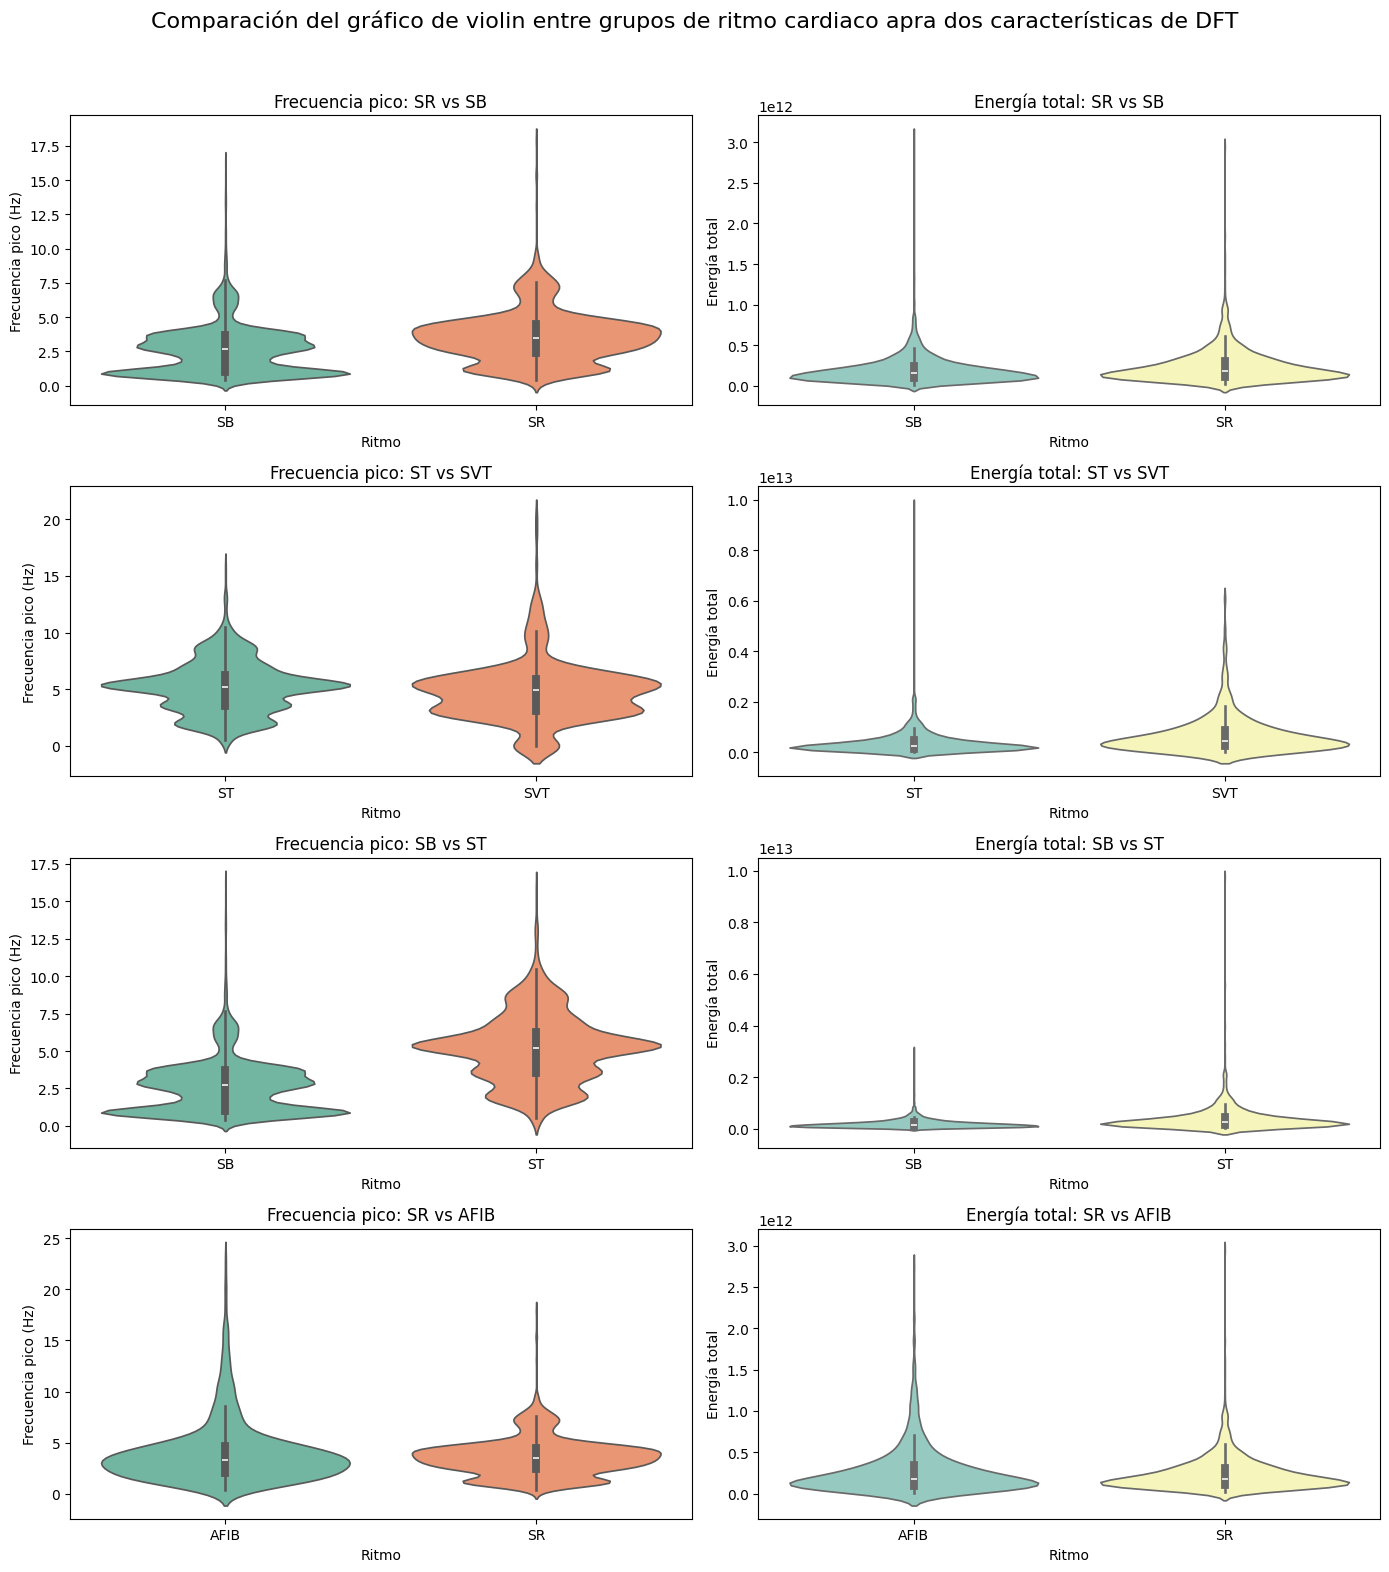

In [28]:
# Reimportar y volver a ejecutar tras reinicio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar todos los grupos relevantes, incluyendo AFIB
df_filtrado = df_dft[df_dft['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT', 'AFIB'])].copy()
df_filtrado['frecuencia_pico'] = pd.to_numeric(df_filtrado['frecuencia_pico'], errors='coerce')
df_filtrado['energia_total'] = pd.to_numeric(df_filtrado['energia_total'], errors='coerce')

# Agregar la comparación SR vs AFIB a las existentes
comparaciones = [
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST'),
    ('SR', 'AFIB')
]

# Crear figura con todos los violin plots en filas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.suptitle("Comparación del gráfico de violin entre grupos de ritmo cardiaco apra dos características de DFT", fontsize=16)

for idx, (grupo1, grupo2) in enumerate(comparaciones):
    df_temp = df_filtrado[df_filtrado['Rhythm'].isin([grupo1, grupo2])]

    # Violin plot Frecuencia pico
    sns.violinplot(data=df_temp, x='Rhythm', y='frecuencia_pico', palette="Set2", inner="box", ax=axes[idx, 0])
    axes[idx, 0].set_title(f"Frecuencia pico: {grupo1} vs {grupo2}")
    axes[idx, 0].set_ylabel("Frecuencia pico (Hz)")
    axes[idx, 0].set_xlabel("Ritmo")

    # Violin plot Energía total
    sns.violinplot(data=df_temp, x='Rhythm', y='energia_total', palette="Set3", inner="box", ax=axes[idx, 1])
    axes[idx, 1].set_title(f"Energía total: {grupo1} vs {grupo2}")
    axes[idx, 1].set_ylabel("Energía total")
    axes[idx, 1].set_xlabel("Ritmo")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


En el gráfico se puede observar cómo varía la frecuencia pico y la energía total entre grupos. Por ejemplo, en la comparación entre SR y SB, la frecuencia pico es mayor en el ritmo sinusal normal, mientras que la bradicardia muestra valores más bajos y concentrados, debido a que tiene una frecuencia cardíaca más lenta. De la misma manera, al comparar SB con ST, se observa que la taquicardia sinusal presenta frecuencias y energías mucho más altas, lo que refleja una activación más intensa del corazón.




## ---------------------------------------------------
## Características relevantes para comparar (DCT):

- **dct_mean (Promedio de los coeficientes DCT)**: Es la media aritmética de los valores obtenidos al aplicar la DCT sobre una señal ECG. Este indicador nos da una idea del nivel general de energía o intensidad que tiene la señal transformada.

- **dct_std (Desviación estándar de los coeficientes DCT):** Nos indica qué tanto varían los datos con respecto al promedio. Una desviación baja indica que los valores están concentrados y que el patrón es más uniforme. Por otro lado, una desviación alta indica que los coeficientes son muy variados y dispersos.

C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\2408015297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dct, x='Rhythm', y='dct_mean', palette='Pastel1')
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\2408015297.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dct, x='Rhythm', y='dct_std', palette='Pastel2')


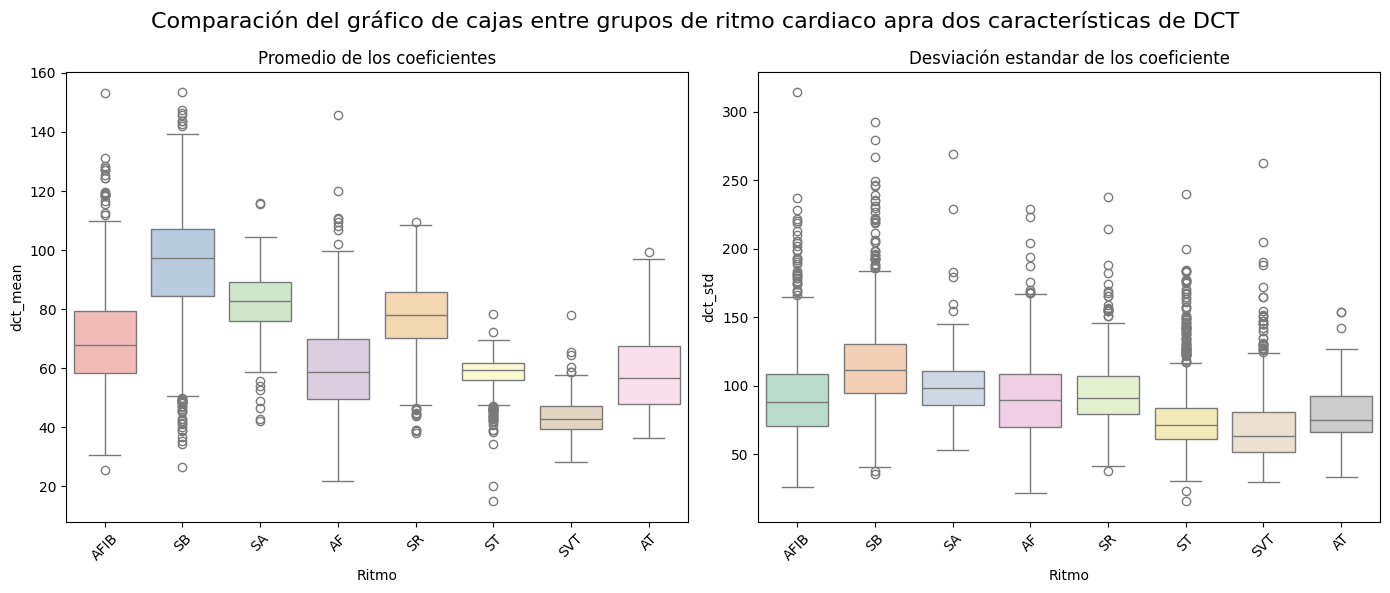

In [29]:
# Gráficos para todos los ritmos disponibles, no solo AFIB y SR
plt.figure(figsize=(14, 6))

# Boxplot de frecuencia pico
plt.subplot(1, 2, 1)
sns.boxplot(data=df_dct, x='Rhythm', y='dct_mean', palette='Pastel1')
plt.title('Promedio de los coeficientes')
plt.ylabel('dct_mean')
plt.xlabel('Ritmo')
plt.xticks(rotation=45)

# Boxplot de energía total
plt.subplot(1, 2, 2)
sns.boxplot(data=df_dct, x='Rhythm', y='dct_std', palette='Pastel2')
plt.title('Desviación estandar de los coeficiente')
plt.ylabel('dct_std')
plt.xlabel('Ritmo')
plt.xticks(rotation=45)

plt.suptitle("Comparación del gráfico de cajas entre grupos de ritmo cardiaco apra dos características de DCT", fontsize=16)
plt.tight_layout()
plt.show()

Promedio de los coeficientes (dct_mean):
En la figura 1 se puede observar que algunos ritmos como SB (bradicardia sinusal) y SR (ritmo sinusal) presentan valores promedio más altos, lo que podría reflejar una mayor concentración de energía espectral en ciertas frecuencias. Por otro lado, podemos ver que ritmos como AFIB y AF tienden a tener valores más bajos y más dispersos.

Desviación estándar de los coeficientes (dct_std):
Se puede observar que la mayoría de los datos tiene mucha variabilidad espectral.

## Pruebas Estadísticas

Con el fin de evaluar si las características extraídas mediante la Transformada Discreta del Coseno (DCT) permiten diferenciar entre distintos tipos de ritmo cardíaco, se realizaron comparaciones estadísticas utilizando la prueba de normalidad de Shapiro–Wilk. Al indicar que ninguna variable sigue una distribución normal, se procede a aplicar la prueba no paramétrica de Mann–Whitney U.

In [30]:
from scipy.stats import shapiro

# Filtrar todos los ritmos de interés
df_filtrado = df_dct[df_dct['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT', 'AFIB'])].copy()

# Convertir columnas relevantes
df_filtrado['dct_mean'] = pd.to_numeric(df_filtrado['dct_mean'], errors='coerce')
df_filtrado['dct_std'] = pd.to_numeric(df_filtrado['dct_std'], errors='coerce')

# Definir comparaciones
comparaciones = [
    ('SR', 'AFIB'),
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST')
]

# Función para imprimir resultados de la prueba de normalidad
def interpretar_normalidad_con_p(nombre_variable, grupo1_nombre, datos1, grupo2_nombre, datos2):
    print(f"Evaluando normalidad para: {nombre_variable} entre {grupo1_nombre} y {grupo2_nombre}")
    resultado1 = shapiro(datos1)
    resultado2 = shapiro(datos2)

    print(f" - {grupo1_nombre}: p-value = {resultado1.pvalue:.5e}")
    if resultado1.pvalue < 0.05:
        print("   → No sigue una distribución normal (p < 0.05)")
    else:
        print("   → Sigue una distribución normal (p ≥ 0.05)")

    print(f" - {grupo2_nombre}: p-value = {resultado2.pvalue:.5e}")
    if resultado2.pvalue < 0.05:
        print("   → No sigue una distribución normal (p < 0.05)")
    else:
        print("   → Sigue una distribución normal (p ≥ 0.05)")
    print()

# Ejecutar comparaciones
for grupo1, grupo2 in comparaciones:
    frecuencia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['dct_mean'].dropna()
    frecuencia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['dct_mean'].dropna()
    interpretar_normalidad_con_p("dct_mean", grupo1, frecuencia1, grupo2, frecuencia2)

    energia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['dct_std'].dropna()
    energia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['dct_std'].dropna()
    interpretar_normalidad_con_p("dct_std", grupo1, energia1, grupo2, energia2)

    print(" ")

Evaluando normalidad para: dct_mean entre SR y AFIB
 - SR: p-value = 3.60252e-05
   → No sigue una distribución normal (p < 0.05)
 - AFIB: p-value = 1.91260e-13
   → No sigue una distribución normal (p < 0.05)

Evaluando normalidad para: dct_std entre SR y AFIB
 - SR: p-value = 1.38781e-18
   → No sigue una distribución normal (p < 0.05)
 - AFIB: p-value = 4.57804e-22
   → No sigue una distribución normal (p < 0.05)

 
Evaluando normalidad para: dct_mean entre SR y SB
 - SR: p-value = 3.60252e-05
   → No sigue una distribución normal (p < 0.05)
 - SB: p-value = 7.75168e-16
   → No sigue una distribución normal (p < 0.05)

Evaluando normalidad para: dct_std entre SR y SB
 - SR: p-value = 1.38781e-18
   → No sigue una distribución normal (p < 0.05)
 - SB: p-value = 8.65868e-22
   → No sigue una distribución normal (p < 0.05)

 
Evaluando normalidad para: dct_mean entre ST y SVT
 - ST: p-value = 5.40660e-27
   → No sigue una distribución normal (p < 0.05)
 - SVT: p-value = 1.37439e-11
   

In [31]:
import pandas as pd
from scipy.stats import mannwhitneyu, shapiro


# Filtrar grupos de interés
df_filtrado = df_dct[df_dct['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT', 'AFIB'])].copy()
df_filtrado['dct_mean'] = pd.to_numeric(df_filtrado['dct_mean'], errors='coerce')
df_filtrado['dct_std'] = pd.to_numeric(df_filtrado['dct_std'], errors='coerce')

# Definir comparaciones
comparaciones = [
    ('SR', 'AFIB'),
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST')
]

# Función para mostrar resultados de Mann-Whitney
def interpretar_mannwhitney(grupo1_nombre, grupo2_nombre, nombre_variable, datos1, datos2):
    resultado_mwu = mannwhitneyu(datos1, datos2, alternative='two-sided')
    print(f"Prueba Mann-Whitney U para: {nombre_variable} entre {grupo1_nombre} y {grupo2_nombre}")
    print(f" - Estadístico U = {resultado_mwu.statistic:.0f}")
    print(f" - p-value = {resultado_mwu.pvalue:.5e}")
    if resultado_mwu.pvalue < 0.05:
        print("   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)")
    else:
        print("   → No hay diferencia estadísticamente significativa entre los grupos (p ≥ 0.05)")
    print()

# Ejecutar para todas las comparaciones
for grupo1, grupo2 in comparaciones:
    frecuencia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['dct_mean'].dropna()
    frecuencia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['dct_mean'].dropna()
    interpretar_mannwhitney(grupo1, grupo2, "dct_mean", frecuencia1, frecuencia2)

    energia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['dct_std'].dropna()
    energia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['dct_std'].dropna()
    interpretar_mannwhitney(grupo1, grupo2, "dct_mean", energia1, energia2)

    print("")

Prueba Mann-Whitney U para: dct_mean entre SR y AFIB
 - Estadístico U = 1010667
 - p-value = 5.74661e-58
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: dct_mean entre SR y AFIB
 - Estadístico U = 800263
 - p-value = 8.58790e-05
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)


Prueba Mann-Whitney U para: dct_mean entre SR y SB
 - Estadístico U = 779351
 - p-value = 2.74887e-224
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: dct_mean entre SR y SB
 - Estadístico U = 1123939
 - p-value = 1.44719e-112
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)


Prueba Mann-Whitney U para: dct_mean entre ST y SVT
 - Estadístico U = 552027
 - p-value = 4.95413e-187
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: dct_mean entre ST y SVT
 - Estadístico U = 348076


C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\1561259666.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp, x='Rhythm', y='dct_mean', palette="Set2", inner="box", ax=axes[idx, 0])
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\1561259666.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp, x='Rhythm', y='dct_std', palette="Set3", inner="box", ax=axes[idx, 1])
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\1561259666.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp, x='Rhythm',

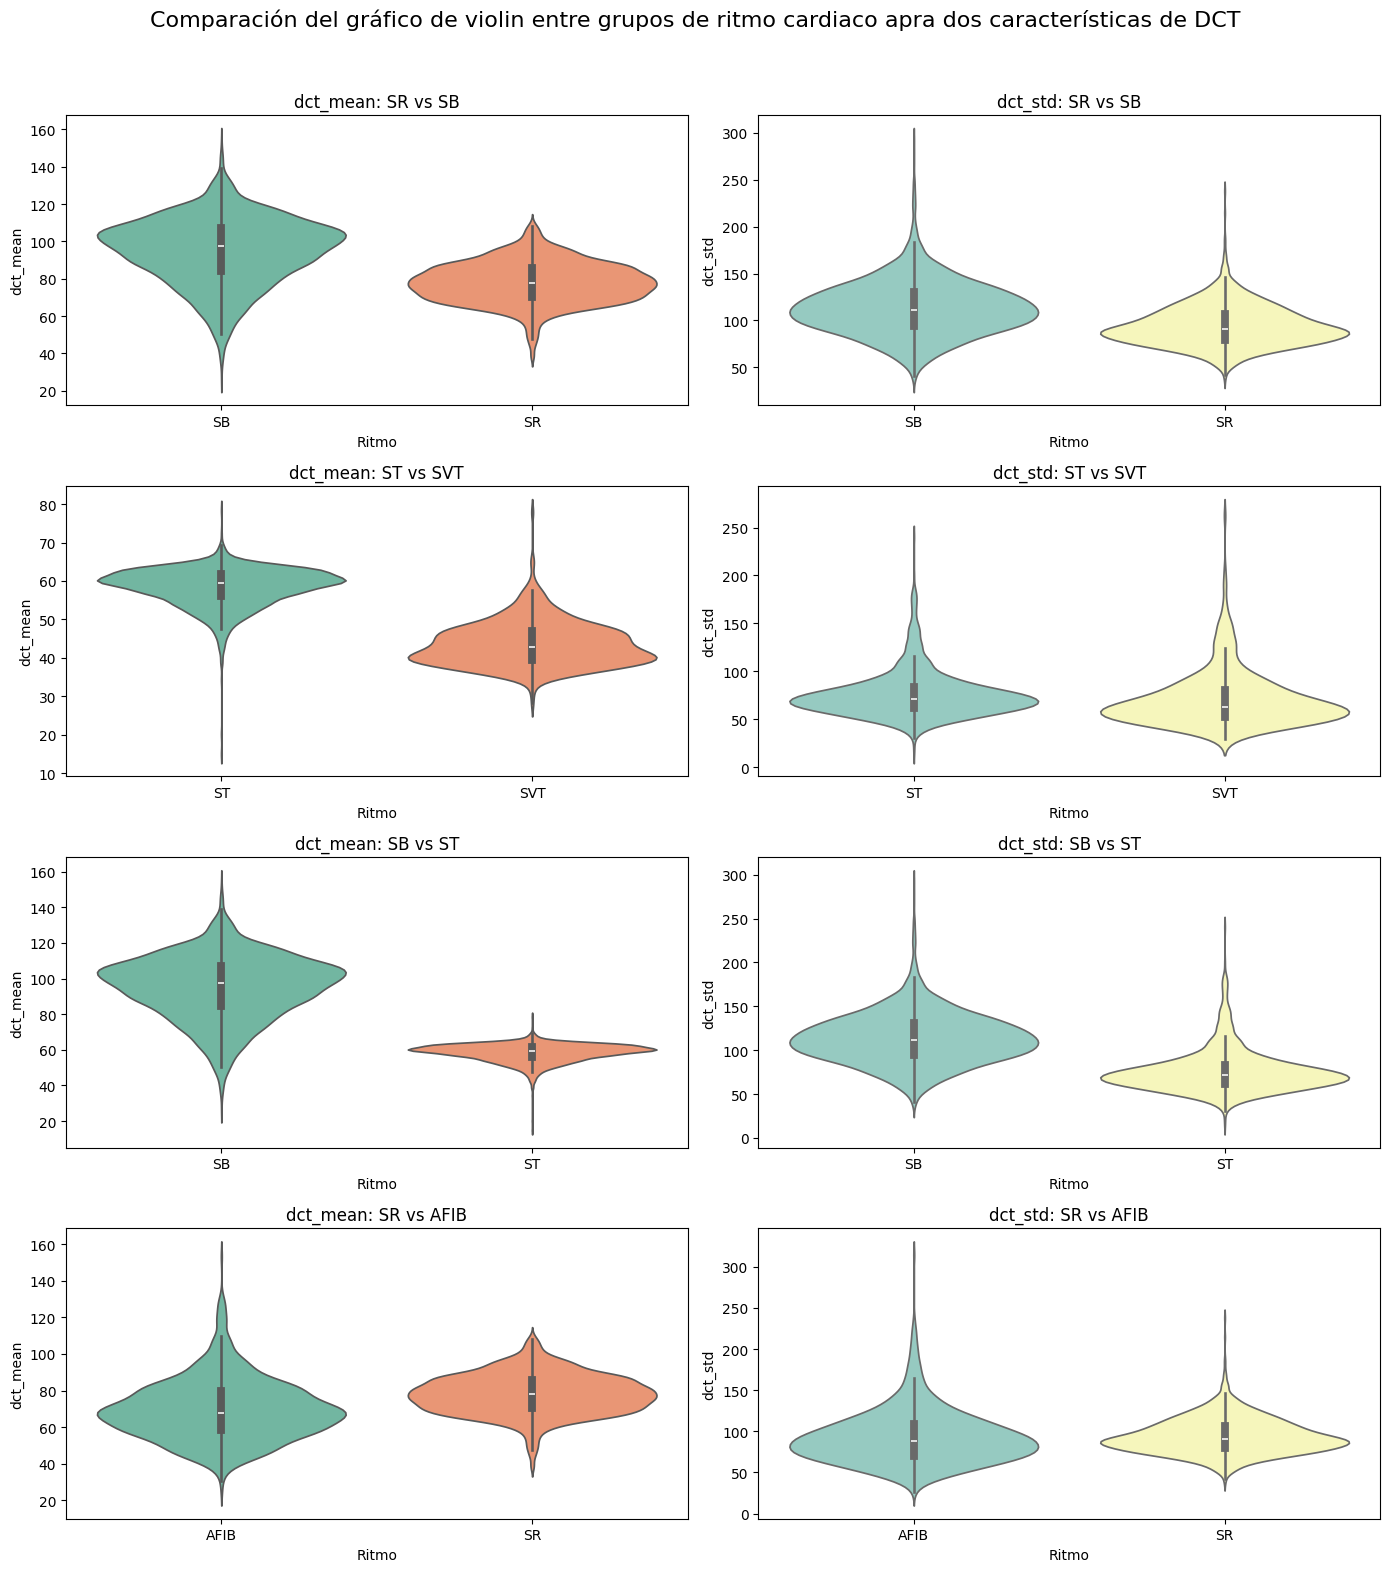

In [32]:
# Reimportar y volver a ejecutar tras reinicio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar todos los grupos relevantes, incluyendo AFIB
df_filtrado = df_dct[df_dct['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT', 'AFIB'])].copy()
df_filtrado['dct_mean'] = pd.to_numeric(df_filtrado['dct_mean'], errors='coerce')
df_filtrado['dct_std'] = pd.to_numeric(df_filtrado['dct_std'], errors='coerce')

# Agregar la comparación SR vs AFIB a las existentes
comparaciones = [
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST'),
    ('SR', 'AFIB')
]

# Crear figura con todos los violin plots en filas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.suptitle("Comparación del gráfico de violin entre grupos de ritmo cardiaco apra dos características de DCT", fontsize=16)

for idx, (grupo1, grupo2) in enumerate(comparaciones):
    df_temp = df_filtrado[df_filtrado['Rhythm'].isin([grupo1, grupo2])]

    # Violin plot Frecuencia pico
    sns.violinplot(data=df_temp, x='Rhythm', y='dct_mean', palette="Set2", inner="box", ax=axes[idx, 0])
    axes[idx, 0].set_title(f"dct_mean: {grupo1} vs {grupo2}")
    axes[idx, 0].set_ylabel("dct_mean")
    axes[idx, 0].set_xlabel("Ritmo")

    # Violin plot Energía total
    sns.violinplot(data=df_temp, x='Rhythm', y='dct_std', palette="Set3", inner="box", ax=axes[idx, 1])
    axes[idx, 1].set_title(f"dct_std: {grupo1} vs {grupo2}")
    axes[idx, 1].set_ylabel("dct_std")
    axes[idx, 1].set_xlabel("Ritmo")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## ---------------------------------------------------
## Características relevantes de MFCC para comparar:

- **mfcc_energy (Energía total contenida en los coeficientes MFCC)**: Nos muestra cuánta "energía" o actividad tiene la señal: en ritmos normales esta energía puede estar más concentrada, mientras que en ritmos irregulares puede variar más.

- **mfcc_entropy (Entropía de la señal en el dominio MFCC):** Nos dice qué tan ordenada o desordenada es la señal. Una señal muy ordenada (como en un corazón latiendo con ritmo normal) tiene menos entropía, mientras que una señal caótica (como en fibrilación auricular) tiene más desorden, y eso se refleja en la entropía.

C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\4286059372.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mfcc, x='Rhythm', y='mfcc_energy', palette='Pastel1')
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\4286059372.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mfcc, x='Rhythm', y='mfcc_entropy', palette='Pastel2')


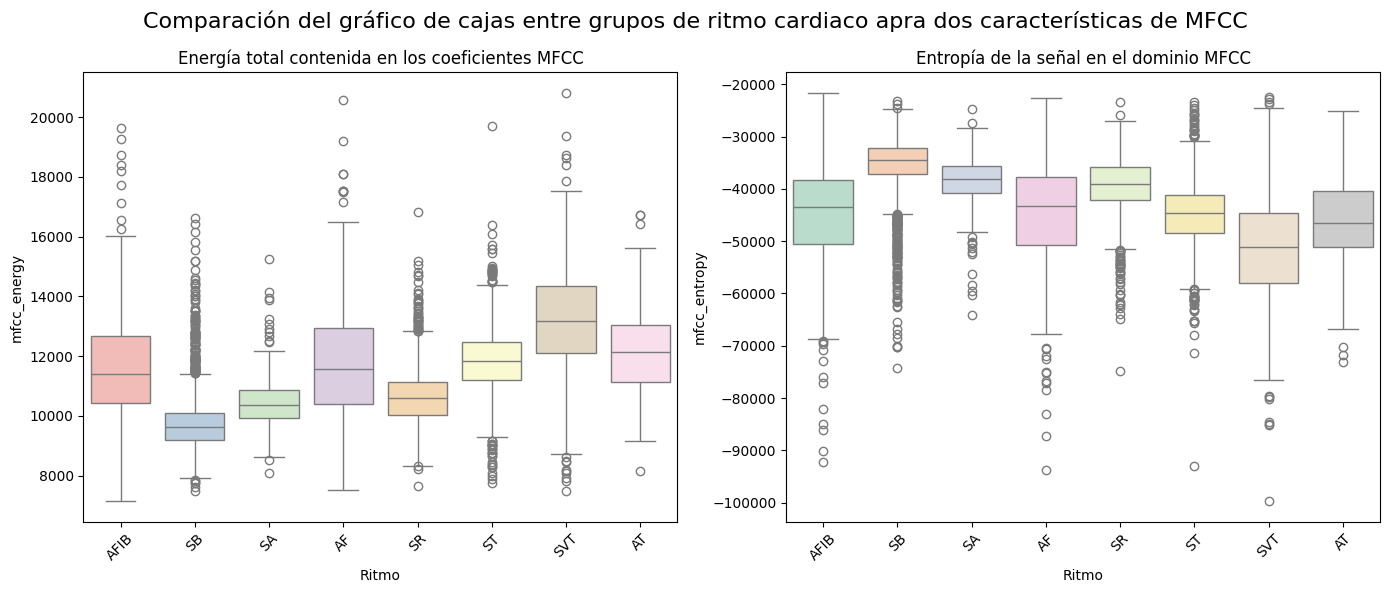

In [33]:
# Gráficos para todos los ritmos disponibles, no solo AFIB y SR
plt.figure(figsize=(14, 6))

# Boxplot de frecuencia pico
plt.subplot(1, 2, 1)
sns.boxplot(data=df_mfcc, x='Rhythm', y='mfcc_energy', palette='Pastel1')
plt.title('Energía total contenida en los coeficientes MFCC')
plt.ylabel('mfcc_energy')
plt.xlabel('Ritmo')
plt.xticks(rotation=45)

# Boxplot de energía total
plt.subplot(1, 2, 2)
sns.boxplot(data=df_mfcc, x='Rhythm', y='mfcc_entropy', palette='Pastel2')
plt.title('Entropía de la señal en el dominio MFCC')
plt.ylabel('mfcc_entropy')
plt.xlabel('Ritmo')
plt.xticks(rotation=45)

plt.suptitle("Comparación del gráfico de cajas entre grupos de ritmo cardiaco apra dos características de MFCC", fontsize=16)
plt.tight_layout()
plt.show()

## Pruebas Estadísticas

Con el fin de evaluar si las características extraídas mediante la Transformada Discreta del Coseno (DCT) permiten diferenciar entre distintos tipos de ritmo cardíaco, se realizaron comparaciones estadísticas utilizando la prueba de normalidad de Shapiro–Wilk. Al indicar que ninguna variable sigue una distribución normal, se procede a aplicar la prueba no paramétrica de Mann–Whitney U.

In [34]:
from scipy.stats import shapiro

# Filtrar todos los ritmos de interés
df_filtrado = df_mfcc[df_mfcc['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT', 'AFIB'])].copy()

# Convertir columnas relevantes
df_filtrado['mfcc_energy'] = pd.to_numeric(df_filtrado['mfcc_energy'], errors='coerce')
df_filtrado['mfcc_entropy'] = pd.to_numeric(df_filtrado['mfcc_entropy'], errors='coerce')

# Definir comparaciones
comparaciones = [
    ('SR', 'AFIB'),
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST')
]

# Función para imprimir resultados de la prueba de normalidad
def interpretar_normalidad_con_p(nombre_variable, grupo1_nombre, datos1, grupo2_nombre, datos2):
    print(f"Evaluando normalidad para: {nombre_variable} entre {grupo1_nombre} y {grupo2_nombre}")
    resultado1 = shapiro(datos1)
    resultado2 = shapiro(datos2)

    print(f" - {grupo1_nombre}: p-value = {resultado1.pvalue:.5e}")
    if resultado1.pvalue < 0.05:
        print("   → No sigue una distribución normal (p < 0.05)")
    else:
        print("   → Sigue una distribución normal (p ≥ 0.05)")

    print(f" - {grupo2_nombre}: p-value = {resultado2.pvalue:.5e}")
    if resultado2.pvalue < 0.05:
        print("   → No sigue una distribución normal (p < 0.05)")
    else:
        print("   → Sigue una distribución normal (p ≥ 0.05)")
    print()

# Ejecutar comparaciones
for grupo1, grupo2 in comparaciones:
    frecuencia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['mfcc_energy'].dropna()
    frecuencia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['mfcc_energy'].dropna()
    interpretar_normalidad_con_p("mfcc_energy", grupo1, frecuencia1, grupo2, frecuencia2)

    energia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['mfcc_entropy'].dropna()
    energia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['mfcc_entropy'].dropna()
    interpretar_normalidad_con_p("mfcc_entropy", grupo1, energia1, grupo2, energia2)

    print(" ")

Evaluando normalidad para: mfcc_energy entre SR y AFIB
 - SR: p-value = 3.32488e-21
   → No sigue una distribución normal (p < 0.05)
 - AFIB: p-value = 1.03913e-11
   → No sigue una distribución normal (p < 0.05)

Evaluando normalidad para: mfcc_entropy entre SR y AFIB
 - SR: p-value = 6.03995e-23
   → No sigue una distribución normal (p < 0.05)
 - AFIB: p-value = 5.02407e-14
   → No sigue una distribución normal (p < 0.05)

 
Evaluando normalidad para: mfcc_energy entre SR y SB
 - SR: p-value = 3.32488e-21
   → No sigue una distribución normal (p < 0.05)
 - SB: p-value = 1.90665e-44
   → No sigue una distribución normal (p < 0.05)

Evaluando normalidad para: mfcc_entropy entre SR y SB
 - SR: p-value = 6.03995e-23
   → No sigue una distribución normal (p < 0.05)
 - SB: p-value = 9.20472e-45
   → No sigue una distribución normal (p < 0.05)

 
Evaluando normalidad para: mfcc_energy entre ST y SVT
 - ST: p-value = 1.62565e-14
   → No sigue una distribución normal (p < 0.05)
 - SVT: p-valu

In [35]:
import pandas as pd
from scipy.stats import mannwhitneyu, shapiro


# Filtrar grupos de interés
df_filtrado = df_mfcc[df_mfcc['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT', 'AFIB'])].copy()
df_filtrado['mfcc_energy'] = pd.to_numeric(df_filtrado['mfcc_energy'], errors='coerce')
df_filtrado['mfcc_entropy'] = pd.to_numeric(df_filtrado['mfcc_entropy'], errors='coerce')

# Definir comparaciones
comparaciones = [
    ('SR', 'AFIB'),
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST')
]

# Función para mostrar resultados de Mann-Whitney
def interpretar_mannwhitney(grupo1_nombre, grupo2_nombre, nombre_variable, datos1, datos2):
    resultado_mwu = mannwhitneyu(datos1, datos2, alternative='two-sided')
    print(f"Prueba Mann-Whitney U para: {nombre_variable} entre {grupo1_nombre} y {grupo2_nombre}")
    print(f" - Estadístico U = {resultado_mwu.statistic:.0f}")
    print(f" - p-value = {resultado_mwu.pvalue:.5e}")
    if resultado_mwu.pvalue < 0.05:
        print("   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)")
    else:
        print("   → No hay diferencia estadísticamente significativa entre los grupos (p ≥ 0.05)")
    print()

# Ejecutar para todas las comparaciones
for grupo1, grupo2 in comparaciones:
    frecuencia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['mfcc_energy'].dropna()
    frecuencia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['mfcc_energy'].dropna()
    interpretar_mannwhitney(grupo1, grupo2, "mfcc_energy", frecuencia1, frecuencia2)

    energia1 = df_filtrado[df_filtrado['Rhythm'] == grupo1]['mfcc_entropy'].dropna()
    energia2 = df_filtrado[df_filtrado['Rhythm'] == grupo2]['mfcc_entropy'].dropna()
    interpretar_mannwhitney(grupo1, grupo2, "mfcc_entropy", energia1, energia2)

    print("")

Prueba Mann-Whitney U para: mfcc_energy entre SR y AFIB
 - Estadístico U = 463902
 - p-value = 7.33562e-54
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: mfcc_entropy entre SR y AFIB
 - Estadístico U = 1008550
 - p-value = 4.07035e-57
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)


Prueba Mann-Whitney U para: mfcc_energy entre SR y SB
 - Estadístico U = 3107884
 - p-value = 9.99615e-221
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: mfcc_entropy entre SR y SB
 - Estadístico U = 985323
 - p-value = 7.07817e-153
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)


Prueba Mann-Whitney U para: mfcc_energy entre ST y SVT
 - Estadístico U = 153547
 - p-value = 8.61273e-52
   → Hay diferencia estadísticamente significativa entre los grupos (p < 0.05)

Prueba Mann-Whitney U para: mfcc_entropy entre ST y SVT
 - Est

C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\2024719510.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp, x='Rhythm', y='mfcc_energy', palette="Set2", inner="box", ax=axes[idx, 0])
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\2024719510.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp, x='Rhythm', y='mfcc_entropy', palette="Set3", inner="box", ax=axes[idx, 1])
C:\Users\dinam\AppData\Local\Temp\ipykernel_15984\2024719510.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_temp, x='

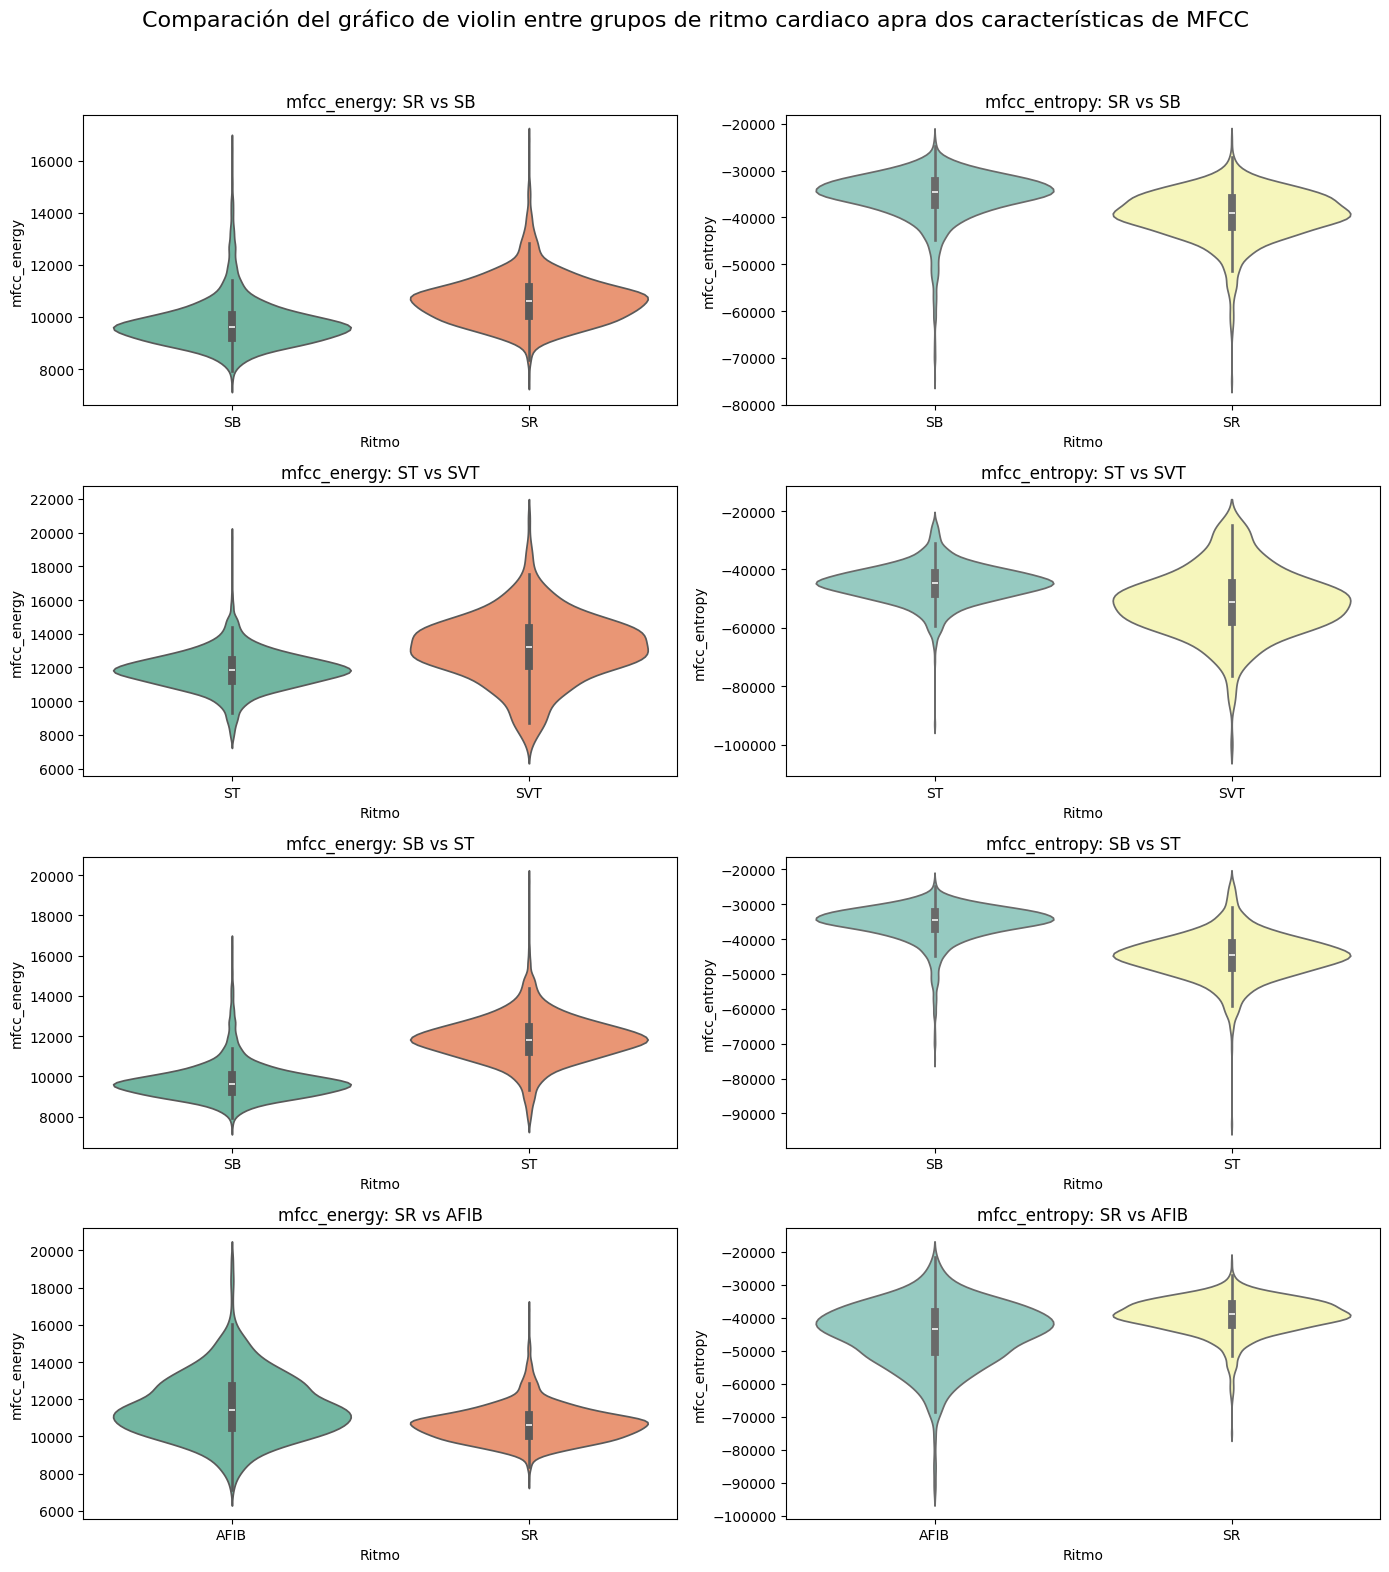

In [36]:
# Filtrar todos los grupos relevantes, incluyendo AFIB
df_filtrado = df_mfcc[df_mfcc['Rhythm'].isin(['SR', 'SB', 'ST', 'SVT', 'AFIB'])].copy()
df_filtrado['mfcc_energy'] = pd.to_numeric(df_filtrado['mfcc_energy'], errors='coerce')
df_filtrado['mfcc_entropy'] = pd.to_numeric(df_filtrado['mfcc_entropy'], errors='coerce')

# Agregar la comparación SR vs AFIB a las existentes
comparaciones = [
    ('SR', 'SB'),
    ('ST', 'SVT'),
    ('SB', 'ST'),
    ('SR', 'AFIB')
]

# Crear figura con todos los violin plots en filas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.suptitle("Comparación del gráfico de violin entre grupos de ritmo cardiaco apra dos características de MFCC", fontsize=16)

for idx, (grupo1, grupo2) in enumerate(comparaciones):
    df_temp = df_filtrado[df_filtrado['Rhythm'].isin([grupo1, grupo2])]

    # Violin plot Frecuencia pico
    sns.violinplot(data=df_temp, x='Rhythm', y='mfcc_energy', palette="Set2", inner="box", ax=axes[idx, 0])
    axes[idx, 0].set_title(f"mfcc_energy: {grupo1} vs {grupo2}")
    axes[idx, 0].set_ylabel("mfcc_energy")
    axes[idx, 0].set_xlabel("Ritmo")

    # Violin plot Energía total
    sns.violinplot(data=df_temp, x='Rhythm', y='mfcc_entropy', palette="Set3", inner="box", ax=axes[idx, 1])
    axes[idx, 1].set_title(f"mfcc_entropy: {grupo1} vs {grupo2}")
    axes[idx, 1].set_ylabel("mfcc_entropy")
    axes[idx, 1].set_xlabel("Ritmo")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




 # -----------------------------------------------------------------------
 # ¿Qué características logra mejor discriminación entre grupos?

Al analizar los resultados obtenidos con las tres técnicas de extracción de características (DFT, DCT y MFCC), se puede observar que las características de DCT y MFCC muestran buena capacidad de discriminación entre los diferentes grupos de ritmos cardíacos, en comparación con las de DFT.


Sin embargo, los resultados obtenidos indican que entre las técnicas de DCT y FMCC, las características obtenidas con DCT muestran mejor discriminación entre los grupos que las características de MFCC, ya que estas tienen un p-valor mucho más bajo. Por otro lado, entre la desviación estándar de los coeficientes (dct\_std) y el promedio de los coeficientes (dct_mean), dct_stdes la característica que mejor discrimina entre los grupos analizados.
\vspace{0.5cm}

Las pruebas de Mann–Whitney U mostraron que dct_mean posee diferencias estadísticamente significativas entre los grupos analizados, con valores de p extremadamente bajos (mucho más vajos que dct_std). Al tener un p valor tan bajo, podemos decir que sí hay diferencias estadísticamente significativas entre los tipos de ritmosmos cardíacos. Por otro lado, en los gráficos de violín, las distribuciones de dct_mean entre los distintos grupos de ritmos cardíacos fueron claramente diferenciables, especialmente entre ritmos opuestos como la bradicardia sinusal (SB) y la taquicardia sinusal (ST), lo que refuerza de manera visual que esta característica es la mejor discrimina entre los grupos.